In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deaths = pd.read_csv("avg_deaths.csv") # 1st January to 15 December 2020
deaths

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [3]:
deaths["Year"] = 2020

In [4]:
import calendar

In [5]:
calendar.monthrange(2020, 1)

(2, 31)

In [6]:
_, num_days = calendar.monthrange(2020, 1)
num_days

31

In [7]:
deaths.iloc[0]["Month"]

1

In [5]:
def days(year, month):
    _, num_days = calendar.monthrange(year, month)
    return num_days

days(2021, 2)

28

In [6]:
days = (deaths[["Year", "Month"]]).apply(lambda row: days(row["Year"], row["Month"]), axis=1)

#by default apply on x-axis means rows

In [10]:
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [11]:
deaths["num_days"] = 0

In [12]:
deaths.columns

Index(['Month', 'New_deaths', 'Year', 'num_days'], dtype='object')

In [13]:
deaths = deaths[["Year", "Month", "num_days", "New_deaths"]] # Rearrange columns

In [14]:
deaths.columns = ["Year", "Month", "Num_Days", "New_Deaths"] # Rename column names

In [15]:
deaths.Num_Days = days

In [16]:
deaths

,Year,Month,Num_Days,New_Deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [17]:
# deaths.loc[11, "Num_Days"] //= 2 # Because data is for only till 15th December 2020

In [18]:
deaths.iloc[11, 2] //= 2 # Above and this give same result

In [19]:
deaths

,Year,Month,Num_Days,New_Deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [20]:
deaths.rename({"New_Deaths": "Avg_Deaths"}, axis=1, inplace=True)

In [21]:
deaths

,Year,Month,Num_Days,Avg_Deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [22]:
deaths["Monthly_Deaths"] = deaths.Num_Days.mul(deaths.Avg_Deaths)

In [23]:
deaths

,Year,Month,Num_Days,Avg_Deaths,Monthly_Deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [24]:
deaths["Cum_Deaths"] = deaths.Monthly_Deaths.cumsum()

In [25]:
deaths

,Year,Month,Num_Days,Avg_Deaths,Monthly_Deaths,Cum_Deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [26]:
# for x in ax.spines:
#     print(x)

In [27]:
cum_cases = [deaths.loc[2, "Cum_Deaths"],deaths.loc[5, "Cum_Deaths"],
             deaths.loc[9, "Cum_Deaths"], deaths.loc[11, "Cum_Deaths"] ]
cum_cases

[2387, 126145, 227055, 297510]

In [40]:
propotion = [round(i/cum_cases[-1],2) for i in cum_cases]
propotion

[0.01, 0.42, 0.76, 1.0]

In [29]:
xmaxs = [0.5 + i*(0.8-0.5) for i in propotion]
xmaxs

[0.503, 0.626, 0.728, 0.8]

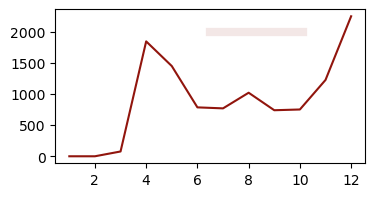

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,2))
ax.plot(deaths["Month"], deaths["Avg_Deaths"], color= "#91150d")
ax.axhline(y=2000, xmin=0.5, xmax=0.8, color = "#91150d", linewidth=6, alpha=0.1) 
# Complete line xmin = 0 =, xmax = 1 

    
plt.show()

# Story Telling

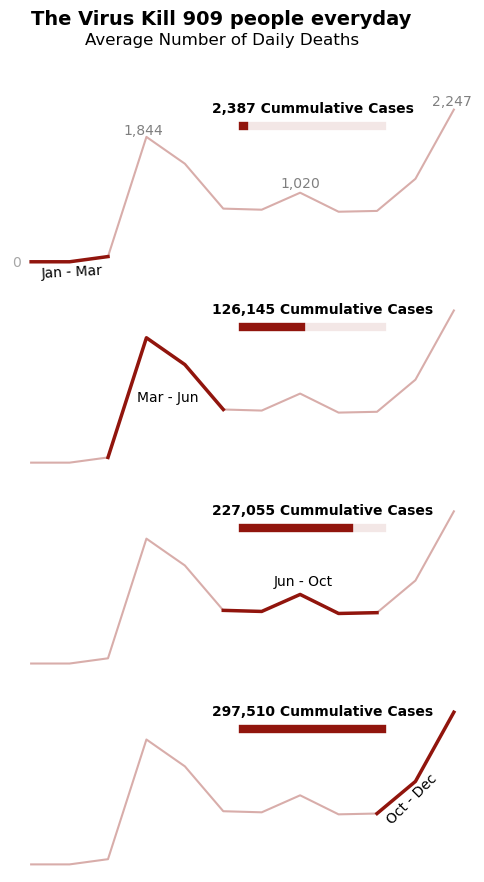

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize = (6,10))
axes = [ax1, ax2, ax3, ax4]

deaths_everyday = round(deaths["Avg_Deaths"].mean())

ax1.text(x=1, y=3500, s=f"The Virus Kill {deaths_everyday:,} people everyday", size=14, weight="bold")
ax1.text(x=2.4, y=3200, s="Average Number of Daily Deaths", size=12)

for ax, x_max, death in zip(axes, xmaxs, cum_cases):
    ax.plot(deaths["Month"], deaths["Avg_Deaths"], color= "#91150d", alpha=0.35)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left = False, bottom = False)
    ax.axhline(y=2000, xmin=0.5, xmax=0.8, color = "#91150d", linewidth=6, alpha=0.1) # Progress Bar
#     Complete line size = xmin = 0, xmax = 1
    ax.axhline(y=2000, xmin=0.5, xmax=x_max, color = "#91150d", linewidth=6) # Progress Bar
    ax.text(x=5.7, y = 2200, s= f"{death:,} Cummulative Cases", weight="bold")
    
#     ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

ax1.text(x=0.5, y=-80, s="0", alpha=0.35)
ax1.text(x=3.40, y=1880, s="1,844", alpha=0.5)
ax1.text(x=7.5, y=1100, s="1,020", alpha=0.5)
ax1.text(x=11.44, y=2300, s="2,247", alpha=0.5)

ax1.plot(deaths["Month"][:3], deaths["Avg_Deaths"][:3], color = "#91150d", linewidth=2.5)
ax1.text(x=1.25, y=-230, s="Jan - Mar", rotation=3)

ax2.plot(deaths["Month"][2:6], deaths["Avg_Deaths"][2:6], color = "#91150d", linewidth=2.5)
ax2.text(x=3.75, y=900, s="Mar - Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_Deaths"][5:10], color = "#91150d", linewidth=2.5)
ax3.text(x=7.3, y=1150, s="Jun - Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_Deaths"][9:], color = "#91150d", linewidth=2.5)
ax4.text(x=10.2, y=600, s="Oct - Dec", rotation=45)
    

plt.show()

In [44]:
ipl = pd.read_csv(r"C:\Users\atif\Dropbox\Data Science CampusX\Pandas Tutorial\ipl_deliveries - ipl_deliveries.csv")
ipl.head(2)

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [125]:
over_0 = ipl[((ipl["innings"] == 1) & (ipl["overs"] < 1) & (ipl["batsman_run"] > 0)) & (ipl["ID"] == 1312200)]["overs"]
over_0

2    0
Name: overs, dtype: int64

In [ ]:
ipl[["overs", "total_run"]].plot.hist()

In [128]:
# ipl[((ipl["innings"] == 1) & (ipl["overs"] < 1)) & (ipl["batsman_run"] > 0)]["total_run"]
run = ipl[((ipl["innings"] == 1) & (ipl["overs"] < 1) & (ipl["batsman_run"] > 0)) & (ipl["ID"] == 1312200)]["total_run"]
run

2    1
Name: total_run, dtype: int64

(array([], dtype=float64),
 array([1], dtype=int64),
 <BarContainer object of 0 artists>)

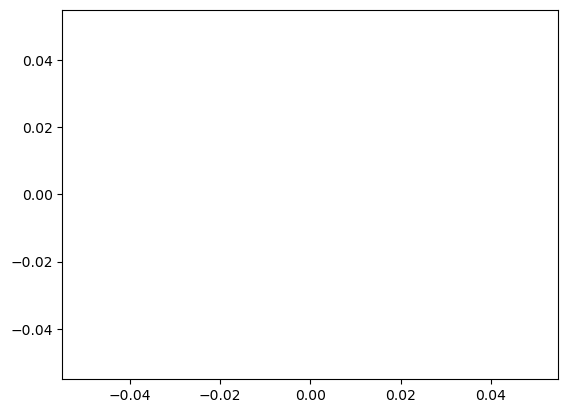

In [132]:
plt.hist(over_0, run)